<a href="https://colab.research.google.com/github/lmcanavals/experiments/blob/main/Distribuciones_e_intervalos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

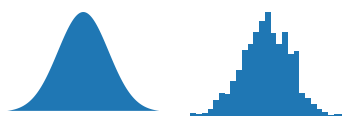

In [2]:
np.random.seed(seed=1981)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(6, 2))

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position

plt.show()

In [3]:
loans_income = pd.read_csv("https://raw.githubusercontent.com/lmcanavals/experiments/main/data/loans_income.csv", squeeze=True)
loans_income.head()

0     67000
1     52000
2    100000
3     78762
4     37041
Name: x, dtype: int64

In [4]:
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
results.head()


,income,type
39693,105000.0,Data
1036,76000.0,Data
10505,71000.0,Data
49513,150000.0,Data
46346,44565.0,Data


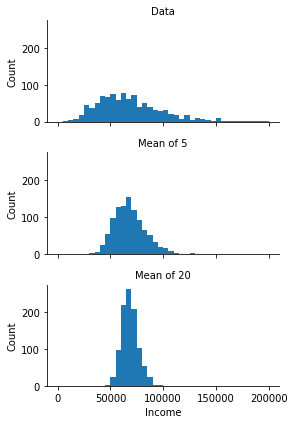

In [5]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.show()

# Bootstrap

In [6]:
results = []
for nrepeat in range(1000):
  sample = resample(loans_income)
  results.append(sample.median())

results = pd.Series(results)
print('Bootstrap Statistics:')
print(f"Original: {loans_income.median()}")
print(f"Bias: {results.mean() - loans_income.median()}")
print(f"std.error: {results.std()}")

Bootstrap Statistics:
Original: 62000.0
Bias: -79.41150000000198
std.error: 227.5195916450539


# Intervalos de Confianza

68760.51844
55734.1


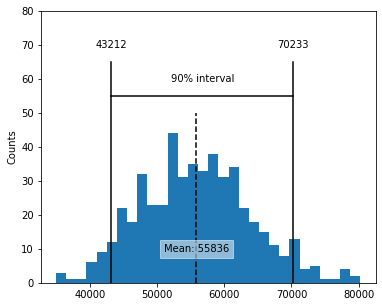

In [9]:
print(loans_income.mean())
np.random.seed(seed=3)
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
  sample = resample(sample20)
  results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(6, 5))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
  ax.plot([x, x], [0, 65], color='black')
  ax.text(x, 70, f'{x:.0f}', ha='center', va='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval', ha='center', va='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        ha='center', va='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.show()
